In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [51]:
C = 1e-7 # mu0/(4 pi)
I = 1 # current

def b_field(r, dr, P):
    d = P - r[:-1]
    nd = np.linalg.norm(d, axis=1)

    v = np.cross(dr, d)

    dB = C*I / nd[:, np.newaxis]**3 * v
    return dB.sum(axis=0)


## Coil

In [10]:
a = 1 # loop radius
n = 0.5 # number of turns
L = 0.5 # width

In [11]:
N = 100000 # number of segment
dph = n * 2*np.pi/N
dL = L/N

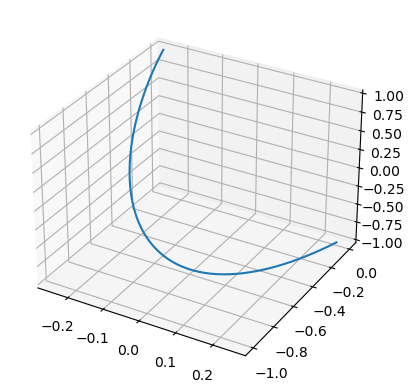

In [12]:
r = np.array([[-L/2+i*dL, -a*np.sin(i*dph), a*np.cos(i*dph)] for i in range(N+1)])
dr = np.diff(r, axis=0)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(r[:, 0], r[:, 1], r[:, 2])
plt.show()

In [17]:
P = np.array([0, 0, 0])

Bx, By, Bz = b_field(r, dr, P)

In [20]:
Bx_th = 4e-7*np.pi*n*I/np.sqrt(4*a*a+L*L)
print(f'{Bx = }, {Bx_th = }, Bx:Bx_th = {Bx/Bx_th}')

Bx = 3.0477925508735954e-07, Bx_th = 3.0477925513918096e-07, Bx:Bx_th = 0.9999999998299707


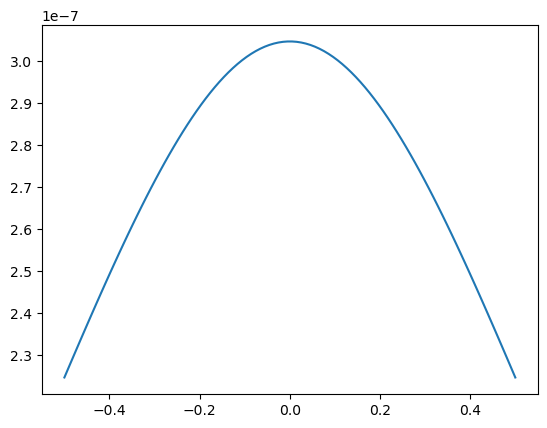

In [22]:
N_points = 100
xmin = -a/2
xmax = +a/2
Bx = np.zeros(N_points)
x = np.linspace(xmin, xmax, N_points)

for i in range(N_points):
    Bx[[i]] = b_field(r, dr, np.array([x[i], 0, 0]))[[0]]

plt.plot(x, Bx)
plt.show()

In [106]:
L = 2*np.pi*a*np.array([0, 1, 0])
F = I * np.cross(L, b_field(r, dr, P))
F

array([ 7.18365673e-07,  0.00000000e+00, -6.06222068e-07])

## Straight Wire

In [57]:
L = 10

In [58]:
N = 10000 # number of segment
dL = L/N

In [71]:
r = np.array([[0, 0, -L/2+i*dL] for i in range(N+1)])
dr = np.diff(r, axis=0)


In [76]:
P = np.array([0, 0.001, 0])

Bx, By, Bz = b_field(r, dr, P)

0.0

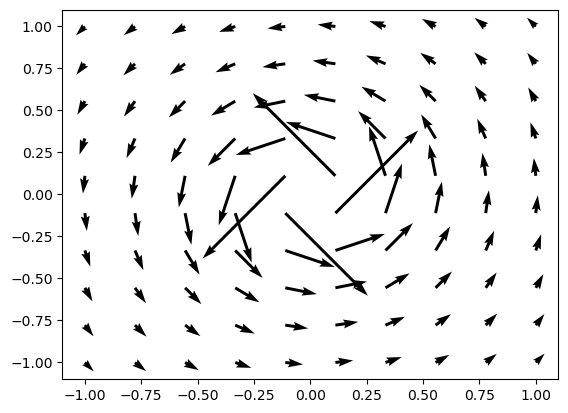

In [79]:
N_plot = 10
x = np.linspace(-1, 1, N_plot)
y = np.linspace(-1, 1, N_plot)

Bx = np.zeros([N_plot, N_plot])
By = np.zeros([N_plot, N_plot])
Bz = np.zeros([N_plot, N_plot])

for i in range(N_plot):
    for j in range(N_plot):
        P = np.array([x[j], y[i], 0])
        Bx[i, j] = b_field(r, dr, P)[0]
        By[i, j] = b_field(r, dr, P)[1]
        Bz[i, j] = b_field(r, dr, P)[2]

fig, ax = plt.subplots()
q = ax.quiver(x, y, Bx, By)

plt.show()


In [53]:
y, z = np.meshgrid(np.arange(-1, 1, 0.1), np.arange(-1, 1, 0.1))

b_field_2(r, dr, 0, y, z)


<ipython-input-51-b44eac2394c7>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  P = np.array([x, y, z])


TypeError: loop of ufunc does not support argument 0 of type numpy.ndarray which has no callable sqrt method

In [50]:
b_field(r, dr, [z, x, y])

<ipython-input-2-3ea73a489e8b>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  d = P - r[:-1]


TypeError: unsupported operand type(s) for -: 'list' and 'float'

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])